<a href="https://colab.research.google.com/github/paulodowd/GoogleColab_Simple2DSimulator/blob/main/Sheet5_SimpleSensorModel_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

<p align="center">
<img src="https://a.pololu-files.com/picture/0J5782.600x480.jpg?d0dc29ca33bde495d7507411e2fa3a8d" width="25%">
</p>

Let's take a look at **sensor noise**. The below is real sense data taken from the Pololu SDS02A Sensor (<a href="https://www.pololu.com/product/2476">product page</a>).  The sensor was setup 10cm away from a flat white surface, and 914 readings were recorded. 

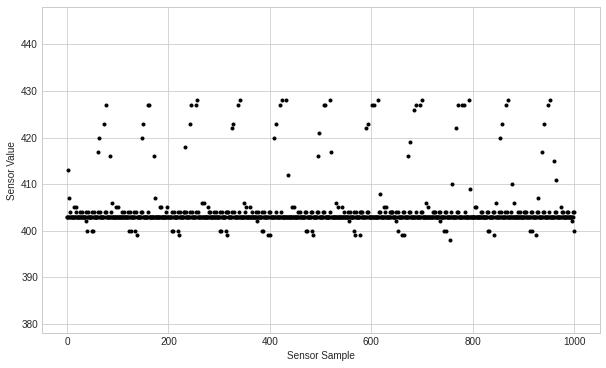

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

# This reads a CSV file from Github which contains 
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/GoogleColab_Simple2DSimulator/main/deflection_cols.csv')


y = Data.loc[:, 'angle=20']
x = np.linspace( 0, len(y), len(y) )

plt.figure(figsize=(10,6))
plt.ylim(min(y)-20,max(y)+20)
plt.xlabel('Sensor Sample')
plt.ylabel('Sensor Value')
plt.plot(x,y,'.', color='black')



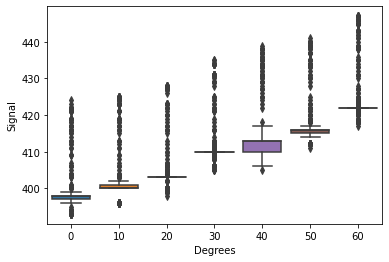

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# This reads a CSV file from Github which contains 
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/GoogleColab_Simple2DSimulator/main/deflection_list.csv')

bplot = sns.boxplot(y='Signal', x='Degrees', data=Data)


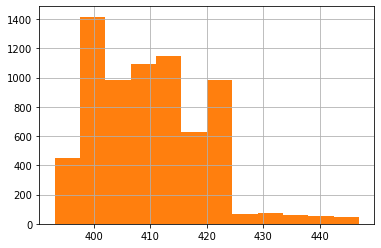

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# This reads a CSV file from Github which contains 
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/GoogleColab_Simple2DSimulator/main/deflection_list.csv')

Data['Signal'].hist(bins=12)


new_range = Data.loc[ Data['Degrees'] < 70 ]
new_range['Signal'].hist(bins=12)




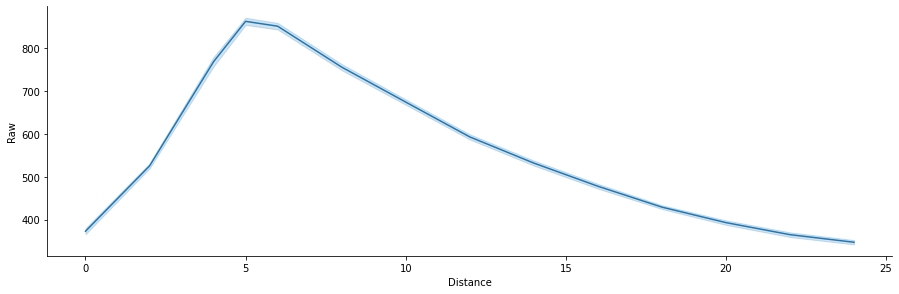

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# This reads a CSV file from Github which contains 
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/GoogleColab_Simple2DSimulator/main/prox_data.csv')
sns.relplot(x="Distance", y="Raw", kind="line", ci="sd", data=Data,height=4, aspect=3.1)



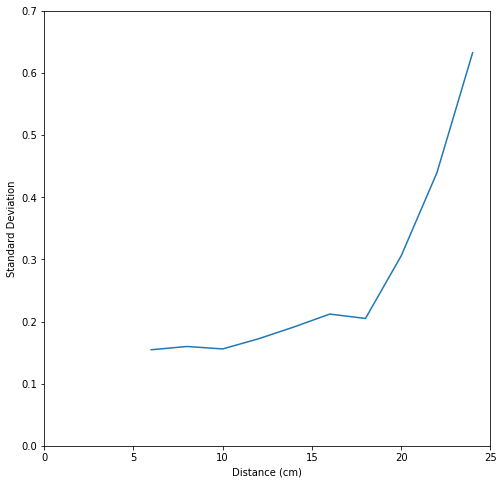

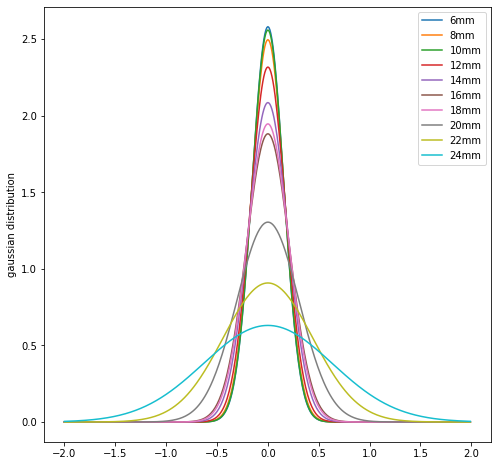

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# This reads a CSV file from Github which contains 
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/GoogleColab_Simple2DSimulator/main/prox_processed.csv')
x_d =  Data.loc[:, 'Distance']
y_sd = Data.loc[:, 'StdDev']

# plot how the standard deviation varies
fig = plt.figure(figsize=(8,8))
plt.plot(x_d,y_sd)

plt.ylabel('Standard Deviation')
plt.xlabel('Distance (cm)')
plt.xlim(0,25)
plt.ylim(0,0.7)
plt.show()

# Set up the x axis range.  You might need to adjust this
# if you explore other parameters in this worksheet.  
x = np.arange(-2,2,.01)

# equation for a gaussian distribution function.
#f = 1/(np.sqrt(2*np.pi)*filtered100_sd) * np.exp( -np.power((x - filtered100_mean)/filtered100_sd, 2)/2)

sd = np.asarray(y_sd)
  
f6 = 1 / (np.sqrt( 2 * np.pi)* sd[0]) * np.exp( -np.power(x/sd[0],2)/2)
f8 = 1 / (np.sqrt( 2 * np.pi)* sd[1]) * np.exp( -np.power(x/sd[1],2)/2)
f10 = 1 / (np.sqrt( 2 * np.pi)* sd[2]) * np.exp( -np.power(x/sd[2],2)/2)
f12 = 1 / (np.sqrt( 2 * np.pi)* sd[3]) * np.exp( -np.power(x/sd[3],2)/2)
f14 = 1 / (np.sqrt( 2 * np.pi)* sd[4]) * np.exp( -np.power(x/sd[4],2)/2)
f16 = 1 / (np.sqrt( 2 * np.pi)* sd[5]) * np.exp( -np.power(x/sd[5],2)/2)
f18 = 1 / (np.sqrt( 2 * np.pi)* sd[6]) * np.exp( -np.power(x/sd[6],2)/2)
f20 = 1 / (np.sqrt( 2 * np.pi)* sd[7]) * np.exp( -np.power(x/sd[7],2)/2)
f22 = 1 / (np.sqrt( 2 * np.pi)* sd[8]) * np.exp( -np.power(x/sd[8],2)/2)
f24 = 1 / (np.sqrt( 2 * np.pi)* sd[9]) * np.exp( -np.power(x/sd[9],2)/2)



#f6 = 1 / (np.sqrt( 2 * np.pi)* 0.25) * np.exp( -np.power(x/0.25,2)/2)
fig = plt.figure(figsize=(8,8))


# Produce the plot!
plt.plot(x,f6, x, f8, x, f10, x, f12, x, f14, x, f16, x, f18, x, f20, x, f22, x, f24 )
plt.legend(['6mm', '8mm', '10mm', '12mm', '14mm', '16mm', '18mm', '20mm', '22mm', '24mm'])

plt.ylabel('gaussian distribution')
plt.show()


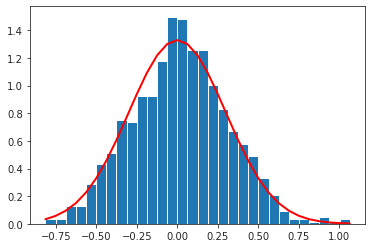

In [79]:
import numpy as np
mu, sigma = 0, 0.3
s = np.random.normal(mu, sigma, 1000)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

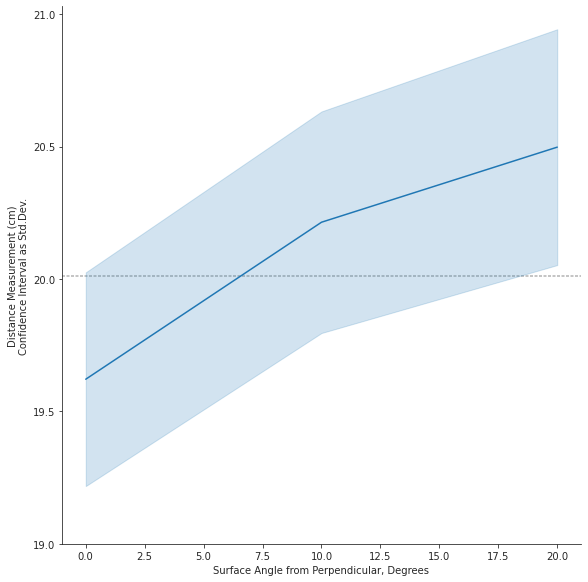

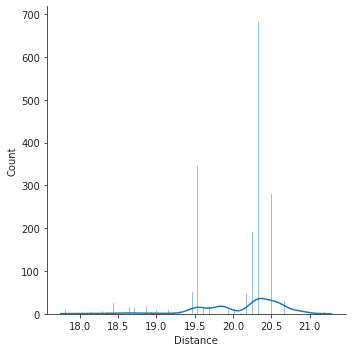

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size":8, "ytick.major.size":8})

# This reads a CSV file from Github which contains 
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/GoogleColab_Simple2DSimulator/main/deflection_list.csv')




new_range = Data.loc[ Data['Angle'] < 30 ]
x_degrees = new_range.loc[:, 'Angle']
y_signal = new_range.loc[:, 'Distance']
#new_y = []
#for s in y_signal:
  #new_y.append( (215.860810 + ( 30.8818528 * s) + (-0.490831337 * (s**2) ) + (0.00307397197 * (s**3) ) + (-0.00000870724210 * (s**4) ) + (0.00000000922678754 * (s**5) ) ) *0.01)
#  new_y.append( ( ((5.0/1024.0)*s)/12.494)**(1/-0.616) )


g = sns.relplot( x="Angle", y="Distance", kind="line", ci="sd", data=new_range, height=8 );
g.map(plt.axhline, y=20.01, color=".7", dashes=(2, 1), zorder=0)
#g.map(plt.axhline, y=20.83, color=".7", dashes=(2, 1), zorder=0)
g.set_axis_labels("Surface Angle from Perpendicular, Degrees", "Distance Measurement (cm)\nConfidence Interval as Std.Dev.")
g.set(yticks=np.linspace( 19.0, 21.0, 5))

#new_y = np.asarray(new_y)
#mean = np.mean(new_y)
#sd = np.std(new_y)


#print(mean)
#print(sd)
#print(cuttoff)
#cutoff = mean + sd
#filtered = new_y[ new_y < cutoff ]
#sns.displot(load,kde=True, binwidth=0.01)
sns.displot(y_signal,kde=True, binwidth=0.01)

In [ ]:
import numpy as np

raw_100mm = np.array([714,715,717,714,728,714,714,714,714,719,
                  714,716,714,720,713,715,714,714,724,714,
                  714,714,717,714,714,714,714,760,714,714,
                  714,714,715,715,713,714,730,716,715,714,
                  714,719,716,714,714,714,715,715,713,714,
                  745,715,713,717,716,715,714,716,714,760,
                  714,718,715,714,714,714,714,717,713,714,
                  715,714,713,723,714,714,717,716,714,715,
                  716,714,754,713,731,715,716,714,715,716,
                  715,714,716,718,714,713,714,714,713,713,
                  716,717,715,714,717,719,716,760,718,713,
                  716,715,713,714,716,713,731,714,716,714,
                  714,714,714,714,717,716,713,715,714,713,
                  746,716,716,714,715,716,714,714,714,760,
                  716,714,714,713,714,715,716,714,736,714,
                  717,714,716,719,718,714,714,716,714,715,
                  714,713,755,713,713,714,713,716,714,716,
                  713,760,714,717,714,714,714,716,714,715,
                  723,716,715,714,714,719,714,713,714,716,
                  713,716,714,714,760,714,723,713,716,716,
                  715,716,717,754,714,716,715,714,714,716,
                  713,714,715,713,714,714,714,719,714,756,
                  714,716,716,715,713,715,756,714,727,714,
                  714,714,714,715,714,717,714,716,716,714,
                  716,713,753,714,713,714,718,714,715,719,
                  714,760,714,716,714,714,714,715,716,714,
                  755,713,714,714,714,719,714,714,713,720,
                  713,715,715,716,745,714,714,717,713,713,
                  715,715,714,756,714,713,714,714,714,715,
                  714,714,746,715,716,715,714,719,716,716,
                  714,714,713,715,716,716,725,716,713,714,
                  714,714,715,714,715,760,714,718,715,714,
                  716,714,713,717,714,715,715,715,714,715,
                  713,716,714,716,717,715,714,715,725,714,
                  768,716,714,714,715,714,716,714,715,721,
                  714,714,716,713,714,714,714,714,716,714,
                  715,719,714,760,715,714,714,717,716,714,
                  713,717,745,713,714,714,713,714,716,714,
                  717,718,716,714,714,713,739,714,714,714,
                  715,714,715,714,716,756,713,714,714,717,
                  714,715,716,714,722,714,718,714,714,727,
                  714,716,717,715,714,715,714,712,758,714,
                  714,714,714,713,714,714,714,754,714,716,
                  713,714,715,716,713,715,718,713,714,716,
                  714,730,714,714,713,716,716,715,714,715,
                  756,715,720,714,714,716,715,714,714,740,
                  714,717,714,715,715,714,714,714,713,714,
                  718,713,716,751,714,736,717,713,714,715,
                  714,714,754,714,717,714,716,714,713,714,
                  715,714,714,716,714,713,719,716,760,715,
                  714,715,715,714,714,747,714,748,714,714,
                  714,714,713,714,715,716,720,714,713,714,
                  714,750,714,715,714,715,715,715,723,714,
                  760,717,713,714,714,714,715,714,714,737,
                  713,714,716,714,719,714,715,714,718,714,
                  715,714,714,747,714,714,716,716,714,716,
                  713,714,768,715,714,714,717,713,714,718,
                  714,726,714,717,716,714,727,714,715,714,
                  714,716,715,713,714,740,714,714,714,714,
                  715,715,715,714,756,716,717,716,714,713,
                  714,716,717,714,713,718,713,714,719,717,
                  713,714,714,713,715,715,715,735,714,754,
                  714,714,716,717,713,715,714,715,720,714,
                  713,714,717,716,714,714,714,717,716,715,
                  715,716,760,716,715,715,717,714,715,714,
                  714,737,715,714,714,713,714,714,713,716,
                  718,713,715,714,714,725,717,714,714,718,
                  714,714,716,715,760,714,714,714,714,714,
                  714,713,714,736,714,715,715,713,727,714,
                  717,714,716,714,716,713,714,755,713,714,
                  714,714,713,716,714,713,756,714,716,714,
                  715,716,714,717,714,724,713,715,714,714,
                  727,714,716,714,714,714,714,714,714,760,
                  714,723,713,715,714,715,714,715,768,714,
                  718,714,713,715,714,716,716,714,714,715,
                  714,714,725,714,754,714,713,714,715,714,
                  715,760,714,719,714,715,713,714,714,714,
                  714,714,716,714,714,715,716,764,714,714,
                  714,715,714,714,723,714,754,714,716,714,
                  713,713,715,716,714,718,713,714,715,714,
                  744,716,714,714,717,715,714,719,714,768,
                  714,714,715,714,715,714,714,714,728,714,
                  713,715,714,719,714,714,714,719,715,715,
                  714,713,751,714,713,717,714,713,715,714,
                  716,754,713,716,714,714,714,714,714,715,
                  720,714,716,714,714,723,714,714,715,714,
                  716,714,714,716,756,714,714,714,714,714,
                  715,714,714,754,714,716,714,714,714,715,
                  714,714,714,716,715,714,713,727,716,716,
                  717,714,714,715,714,714,762,714,722,717,
                  715,714,715,714,714,713,714,716,713,715,
                  714,714,713,714])

What can we tell by looking at the data above?   

It is quite difficult to see any thing meaningful!



# Scatter Plot

Let't first of all create a scatter plot. Often, making a graph can help us significantly to understand the challenge:

914


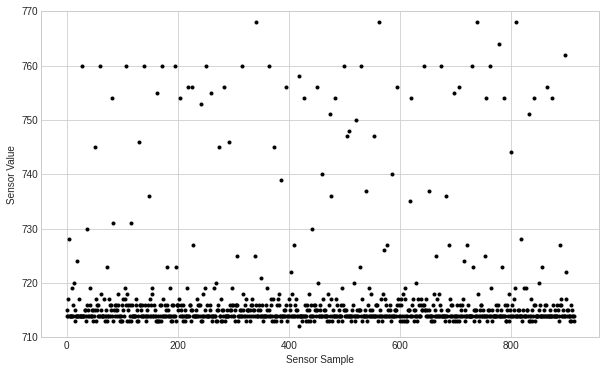

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

print(len(raw_100mm))
x = np.linspace( 0, len(raw_100mm), len(raw_100mm) )
y = raw_100mm

plt.figure(figsize=(10,6))
plt.ylim(710,770)
plt.xlabel('Sensor Sample')
plt.ylabel('Sensor Value')
plt.plot(x,y,'.', color='black')


In the above, we can see that most readings from the sensor have a value of approximately 714, but that there are some readings which appear to be biased positively towards a limit of 770.  





# Histogram


Our scatter plot gave us a visual indication of where most of our sensor readings exist.  

Lets create a histogram of these readings to better understand their distribution:

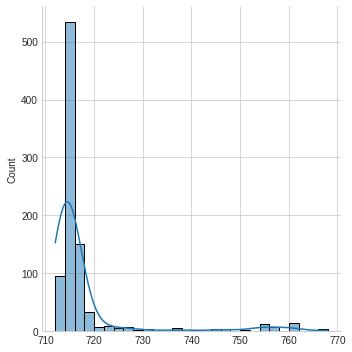

In [ ]:
import seaborn as sns

#counts,bins = np.histogram(raw_100mm)
#plt.xlabel('Sensor Reading')
#plt.ylabel('Probability')
#plt.hist(bins[:-1], bins,weights=counts,density=True)


sns.displot(raw_100mm,kde=True, binwidth=2)

In the above histogram, we can see that the overwhelming majority of our sensor readings are grouped up in the range 710:730.  Let's quickly compute some simple statistics:

In [ ]:
raw100_mean = np.mean(raw_100mm)
raw100_median = np.median(raw_100mm)
raw100_sd = np.std( raw_100mm)
raw100_var = np.var(raw_100mm)

print("Mean: ", raw100_mean)
print("Median: ",  raw100_median)
print("Std.Dev: ", raw100_sd )
print("Var: ", raw100_var)

NameError: ignored

# A Simple Rejection Filter

Using the above statistics, we can make a simple rejection filter to remove the infrequent outliers in our data:

In [ ]:

# Define our cut off value as 3 standard deviations
# above the mean.  You can change this, and see the
# effect.  
cutoff = raw100_mean + ( raw100_sd * 3)

# This line drops all the elements of the array that are 
# larger than our cut off value.
filtered100 = raw_100mm[ raw_100mm < cutoff ]

# Plot the result of the above.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x = np.linspace( 0, len(filtered100), len(filtered100) )
y = filtered100

plt.figure(figsize=(10,6))
plt.ylim(710,770)
plt.xlabel('Sensor Sample')
plt.ylabel('Sensor Value')
plt.plot(x,y,'.', color='black')

NameError: ignored

Let's look at a histogram again, this time of the filtered 100mm data:

Mean:  715.6059907834101
Median:  714.0
Std.Dev:  4.53700210201051
Var:  20.58438807364778


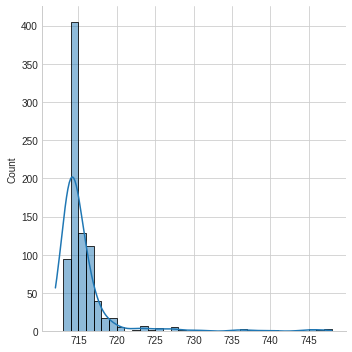

In [ ]:


import seaborn as sns

#counts,bins = np.histogram(filtered)
#plt.xlabel('Sensor Reading')
#plt.ylabel('Probability')
#plt.hist(bins[:-1], bins,weights=counts,density=True)


sns.displot(filtered100,kde=True, binwidth=1)

filtered100_mean = np.mean(filtered100)
filtered100_median = np.median(filtered100)
filtered100_sd = np.std( filtered100)
filtered100_var = np.var(filtered100)

print("Mean: ", filtered100_mean)
print("Median: ",  filtered100_median)
print("Std.Dev: ", filtered100_sd )
print("Var: ", filtered100_var)



# Gaussian Distribution Function

Let's now use our simple stats on the filtered 100mm to create a **Gaussian distribution function** which will be representative of how our sensor performs at 100mm.  This is the simple model we will use in simulation for an unrealiable sensor:

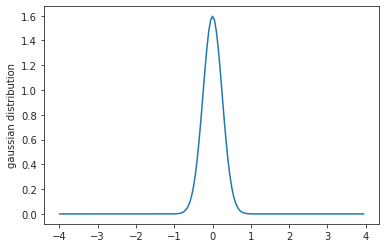

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the x axis range.  You might need to adjust this
# if you explore other parameters in this worksheet.  
x = np.arange(-4,4,.05)

# equation for a gaussian distribution function.
#f = 1/(np.sqrt(2*np.pi)*filtered100_sd) * np.exp( -np.power((x - filtered100_mean)/filtered100_sd, 2)/2)

f = 1 / (np.sqrt( 2 * np.pi)* 0.25) * np.exp( -np.power(x/0.25,2)/2)


# Produce the plot!
plt.plot(x,f)

plt.ylabel('gaussian distribution')
plt.show()




In the above plot, we approximate the distirbution of likely sensor readings as the Gaussian function.  You can compare this to the prior histogram plot with a trendline.  

The model isn't perfect, but it is better than assuming our sensor works reliably 100% of the time.  You can attempt to refine your model of the sensor noise by adjusting the parameters we have explored, such as the **cutoff** value we determined for the rejection filter.


In our simulator, ...

# Updating our Simulator

# Looking at more data:

Below are the raw data for other measurements made by the sensor at 25mm, 50mm, 150mm, 200mm, 250mm and 300mm.  

In [21]:
raw_25mm = np.array([656,658,657,658,656,656,668,657,657,657,657,657,657,657,657,657,657,657,663,657,686,657,657,657,658,657,657,657,656,658,657,656,665,657,656,657,657,657,657,657,657,692,657,658,657,656,665,657,656,658,657,657,657,657,656,704,656,657,656,656,663,657,656,657,658,657,658,659,657,704,657,657,656,658,656,657,657,657,659,657,658,659,657,704,657,656,657,657,656,660,704,656,659,658,656,659,657,657,657,657,657,657,656,658,708,657,661,657,657,657,657,656,657,661,657,657,657,657,708,656,657,657,657,657,658,656,656,660,656,658,657,656,708,658,656,657,658,657,657,657,661,660,657,657,656,656,657,658,657,656,658,656,657,701,656,667,657,656,656,658,657,659,657,658,658,657,657,702,656,657,657,657,656,657,656,657,664,656,660,657,657,698,657,657,656,657,657,657,657,656,667,656,657,658,656,665,657,656,657,658,656,657,684,657,668,657,657,657,657,658,657,656,657,658,657,656,662,656,687,657,656,656,658,658,657,680,656,657,658,656,666,657,657,657,656,657,658,657,657,704,656,658,657,656,665,657,658,656,658,657,657,657,657,705,656,657,657,656,658,657,656,656,659,656,657,665,657,704,657,657,656,657,656,657,656,657,658,656,657,663,657,657,657,656,656,658,657,657,704,657,659,657,657,663,657,657,657,659,657,657,656,657,704,656,659,657,658,663,657,657,657,659,657,657,663,657,704,657,657,660,656,657,659,657,657,658,657,658,663,658,704,657,657,657,658,656,656,704,657,659,656,657,663,656,656,657,657,656,657,657,656,704,658,659,657,656,657,657,657,658,659,657,658,657,658,704,657,657,657,657,656,657,657,658,659,659,658,659,657,704,659,657,657,657,656,657,657,658,660,657,657,657,657,656,659,657,657,657,657,657,706,658,663,657,656,657,657,657,656,657,657,658,657,656,705,657,656,658,657,657,657,656,657,661,657,660,657,657,698,657,656,656,656,656,657,657,656,670,656,657,657,657,684,656,656,657,658,658,657,692,657,670,657,656,658,657,657,657,657,656,658,656,656,700,657,669,660,657,657,657,657,657,671,656,658,657,656,666,657,656,657,657,657,657,656,657,674,657,658,657,656,663,657,657,658,659,657,658,657,656,678,657,656,657,657,656,657,656,657,657,657,658,664,656,686,657,657,657,657,656,657,658,657,659,657,657,663,656,656,656,657,658,657,656,657,704,656,659,657,656,665,657,656,657,657,656,657,656,657,705,656,657,656,657,663,657,657,657,658,656,660,667,656,704,657,656,657,657,657,657,657,657,658,656,656,663,656,704,657,656,657,659,657,657,704,656,658,657,658,663,656,656,657,657,657,661,657,657,704,659,659,657,656,663,657,656,657,659,656,657,657,657,704,657,657,657,656,657,657,656,657,658,656,657,663,657,704,657,656,657,657,657,656,657,657,658,656,657,663,657,657,659,656,657,658,656,657,704,657,659,657,657,659,658,658,657,657,657,657,657,657,704,656,657,659,656,663,657,657,657,659,657,657,663,657,704,657,656,656,657,657,658,657,657,659,655,657,659,656,704,659,656,656,657,656,657,704,657,659,657,657,659,659,657,657,656,656,657,660,656,704,657,659,657,656,659,657,656,656,659,657,658,656,657,708,657,657,657,656,657,657,656,656,661,657,657,657,657,708,657,657,657,658,658,657,656,657,660,658,656,657,656,657,657,657,657,658,657,657,712,657,661,657,657,657,657,656,657,656,657,658,656,657,705,657,659,657,656,656,657,657,657,660,657,658,657,657,705,656,658,657,657,656,657,656,656,662,657,658,657,657,703,657,658,656,660,656,657,701,657,664,656,659,657,657,656,657,657,656,659,657,658,697,657,670,657,658,657,662,657,657,662,656,658,657,658,703,656,656,657,657,657,658,658,656,667,657,658,656,656,695,657,657,657,657,657,657,657,656,669,656,656,656,657,656,658,657,659,658,657,658,703,657,663,657,656,657,658,656,657,657,657,657,657,657,703,657,656,657,657,657,657,657,658,668,659,658,657,657,690,657,656,658,657,657,657,657,657,664,657,656,657,657,693,657,657,657,658,656,657,703])
raw_50mm = np.array([881,878,877,877,877,878,878,878,878,879,878,877,940,877,884,878,877,878,879,877,877,884,877,879,878,878,930,878,878,878,877,878,878,877,878,891,877,879,877,878,895,878,878,878,879,878,879,878,878,896,878,878,878,877,877,878,877,877,880,877,879,895,878,924,879,878,878,878,878,878,878,879,879,880,878,895,877,878,878,877,879,879,878,878,928,878,879,880,878,895,878,878,878,877,880,878,877,877,928,877,878,878,877,895,878,878,877,880,878,878,879,878,928,878,878,878,878,878,878,877,877,882,877,877,879,878,940,878,878,878,879,879,878,940,878,882,877,877,878,877,877,878,877,878,879,879,878,942,878,884,878,878,878,878,881,878,886,878,879,877,877,916,877,879,878,877,878,878,878,877,890,878,879,878,878,919,878,878,878,879,878,878,877,877,896,877,879,878,878,877,878,881,877,880,878,878,895,878,928,878,879,878,878,878,879,877,878,881,877,877,895,877,877,879,882,878,879,878,878,928,878,880,877,877,895,878,878,878,878,878,879,878,877,928,878,877,878,880,879,878,878,878,880,878,878,877,877,936,878,878,878,876,877,878,878,877,881,878,881,879,878,936,878,878,878,880,877,879,940,878,881,878,878,878,878,877,878,878,877,879,878,876,937,878,884,878,878,878,879,877,878,886,877,879,878,877,934,880,877,878,878,878,878,878,881,886,878,879,877,880,935,878,878,877,879,878,879,878,877,891,878,877,878,878,877,878,878,877,879,877,879,895,877,918,879,877,878,879,877,879,878,876,879,879,878,895,878,878,877,878,880,878,878,880,910,877,879,879,877,895,878,877,878,878,878,878,878,878,928,877,878,877,878,879,879,877,878,880,876,879,879,877,928,878,877,880,878,878,878,877,877,880,878,878,891,877,928,879,877,878,879,877,879,944,877,881,878,878,877,878,878,878,878,878,879,878,878,936,878,888,878,877,878,879,878,878,888,878,878,878,878,915,878,878,877,877,877,878,877,878,892,877,879,878,878,895,878,879,878,879,877,878,877,878,928,878,879,878,878,878,878,877,877,878,877,879,879,878,928,878,876,877,879,878,878,878,878,880,877,878,879,877,877,878,878,878,880,878,879,928,877,880,878,876,877,879,877,877,877,878,880,878,877,940,877,878,878,877,878,881,877,878,886,877,878,878,879,921,878,878,877,877,878,879,877,877,885,877,877,878,879,922,879,877,878,879,877,877,921,878,898,878,878,878,877,878,878,877,878,879,877,878,895,881,928,878,878,877,879,878,879,928,878,879,878,877,895,878,878,880,877,877,879,877,878,928,878,880,878,877,879,878,878,880,879,877,879,878,877,944,877,878,879,877,877,879,878,877,883,878,878,878,878,930,878,879,877,879,879,879,877,878,891,877,877,880,878,878,878,878,876,879,878,878,910,878,896,877,878,879,878,878,879,878,877,879,880,877,895,877,877,878,878,878,879,877,878,928,877,879,877,877,895,877,877,878,877,877,879,879,877,928,877,877,878,878,879,878,878,878,879,878,879,879,878,928,878,877,878,877,877,878,878,877,881,878,877,878,878,941,878,877,879,879,877,879,938,877,886,878,877,878,878,877,878,878,877,878,878,877,933,878,883,878,878,878,878,878,878,886,877,880,878,877,906,877,876,878,879,877,878,878,878,924,878,880,877,878,895,878,878,878,879,877,879,878,877,928,878,878,878,877,877,878,877,877,879,877,879,895,878,928,878,877,878,878,877,878,877,877,880,877,879,877,878,878,877,877,878,878,877,880,938,877,886,878,877,878,879,878,878,878,878,879,879,877,917,878,878,877,877,878,879,878,879,891,877,879,877,875,915,880,877,878,878,878,879,878,879,928,877,878,878,877,895,878,877,878,879,877,879,895,877,928,879,877,877,878,878,878,877,878,880,878,878,879,878,944,877,877,879,879,877,879,944,877,880,879,877,877,878,878,878,877,877,878,877,878,938,877,886,880,877,878,879,878,878,887,877,878,878,878,895,877,878,879,877,877,879,877,878,892,876,879,876,877,895,878,878,878,879,877,878,878,878,905,877,879,879,877,878,878])
# raw_100mm = we have this dataset at the top of this sheet. 
raw_150mm = np.array([523,522,521,522,522,522,522,522,522,522,522,522,521,568,522,522,523,522,521,522,568,521,523,522,522,522,522,522,522,522,522,522,522,522,568,521,523,522,521,522,522,522,522,523,522,522,522,522,568,522,522,522,522,522,522,521,522,523,522,522,522,521,568,523,522,522,523,522,522,522,523,523,522,522,522,522,522,522,522,522,525,521,522,568,521,523,523,522,522,522,522,522,522,523,522,521,522,568,521,522,524,522,522,522,521,522,524,521,522,523,522,566,522,522,522,522,523,522,521,522,524,521,522,523,521,567,522,522,522,522,522,522,568,522,524,522,522,523,522,522,522,521,522,523,521,522,568,521,525,522,522,521,522,522,522,526,522,522,522,523,566,522,522,522,521,522,522,521,522,525,522,522,522,522,564,522,522,522,524,522,522,522,522,526,521,524,522,521,522,522,522,522,522,522,522,559,522,529,522,522,522,523,522,522,522,522,522,522,523,559,522,522,522,522,522,524,522,522,527,522,522,522,522,557,522,522,522,522,522,522,521,522,532,522,522,522,523,531,523,522,522,523,522,522,557,522,531,522,521,523,522,522,521,522,522,523,522,522,562,522,529,522,522,522,522,522,522,529,522,522,522,522,540,523,522,523,522,521,522,522,521,528,522,522,522,522,550,522,522,522,522,522,523,521,521,529,522,522,522,522,521,522,522,522,523,522,522,535,522,550,521,522,522,522,522,523,522,522,523,522,522,522,521,521,522,522,522,522,522,522,568,522,523,521,522,523,522,522,522,522,522,522,522,521,568,522,521,522,522,522,522,522,522,523,522,523,523,522,568,522,522,522,522,521,522,523,522,524,522,521,522,522,568,522,522,522,522,522,522,552,522,523,522,521,522,522,522,522,522,522,523,522,522,568,522,523,521,522,523,522,521,522,524,522,522,522,521,568,522,523,522,522,522,522,523,522,524,522,523,523,522,568,522,522,522,522,521,522,522,521,524,522,522,522,522,522,522,522,522,521,522,522,568,522,524,522,523,522,522,521,522,522,521,522,522,522,567,521,522,521,522,523,523,522,522,523,522,523,523,521,568,522,522,522,522,522,522,522,523,523,522,522,522,522,568,523,521,522,522,522,522,568,522,523,522,522,522,522,522,523,522,522,522,522,522,568,521,524,523,522,522,523,522,522,524,522,522,522,522,565,522,522,522,521,522,522,522,522,525,521,523,523,521,568,522,521,521,523,522,522,522,522,524,521,522,522,522,522,522,521,522,523,521,522,568,522,525,522,521,521,523,523,522,522,522,522,522,522,568,522,522,522,521,522,522,522,522,525,521,523,523,522,568,522,522,522,522,522,522,521,522,526,521,522,522,522,564,522,522,522,523,522,522,564,522,526,523,523,522,521,522,522,521,522,522,521,522,566,522,526,522,522,522,522,522,521,525,522,523,522,522,568,521,523,522,522,522,522,522,522,525,521,523,522,522,560,522,522,522,522,522,522,521,522,526,522,522,522,521,522,523,522,522,523,522,522,564,522,525,522,522,522,522,522,522,522,522,523,522,524,562,522,522,522,522,521,524,522,522,530,522,523,522,521,555,522,522,522,521,522,522,522,522,527,522,521,522,521,562,523,522,522,523,522,522,564,523,527,521,522,522,522,522,522,521,521,523,522,521,555,521,531,522,522,522,522,522,522,527,522,523,522,522,559,522,521,523,522,522,522,522,521,525,523,522,521,522,562,522,522,524,522,522,523,522,521,527,522,521,522,522,521,522,522,521,523,522,522,562,522,530,521,522,523,522,522,522,522,522,522,521,522,564,523,521,522,522,521,522,523,522,526,522,523,522,522,563,522,522,522,522,521,522,521,521,528,522,522,522,522,562,522,522,522,522,522,522,564,522,526,522,521,522,522,522,522,522,522,522,522,522,560,521,528,522,522,522,522,522,523,527,521,523,522,521,556,522,521,522,522,522,522,522,522,526,522,523,522,522,561,522,521,522,523,521,522,522,522,527,522,522,522,522,522,522,522,522,523,522,522,560,521,530,522,522,522,522,521,522,523,522,524,522,522,557,522,522,522,522,522,522,521,522])
raw_200mm = np.array([411,408,410,409,410,407,445,407,411,411,410,410,411,408,411,411,407,411,407,407,447,410,407,410,407,410,411,407,408,412,411,408,408,407,449,408,410,407,410,410,411,407,407,414,410,410,407,410,444,410,407,410,408,407,408,447,407,410,410,410,410,410,410,408,407,410,411,410,408,447,407,410,410,410,410,407,410,408,410,410,408,410,410,445,407,410,407,410,407,408,407,407,412,407,411,410,410,436,412,410,410,411,410,408,407,410,411,407,410,411,410,410,410,408,411,408,407,410,443,410,412,410,407,407,410,407,408,407,410,411,410,407,437,407,410,410,411,410,408,410,408,413,407,411,408,410,444,408,407,407,410,410,408,407,407,411,407,410,407,407,436,408,407,407,411,407,411,435,410,417,407,410,410,407,410,410,407,410,408,410,408,440,407,415,410,407,408,411,411,408,415,410,408,407,410,442,407,411,410,410,407,408,410,410,415,410,411,410,410,431,407,411,410,408,410,408,407,410,419,407,410,407,407,407,408,407,410,409,407,411,437,407,413,410,407,410,408,407,410,410,407,408,408,410,434,410,407,408,407,407,408,410,411,416,407,408,407,410,431,410,410,407,407,410,411,407,407,414,407,407,410,410,437,407,407,407,408,407,411,445,407,415,410,410,410,407,407,412,410,407,411,410,407,440,407,415,411,407,410,408,410,408,415,411,408,410,410,443,411,410,408,407,410,408,410,410,414,408,411,407,410,445,410,408,410,411,410,411,410,410,415,410,410,411,407,407,410,410,407,408,409,408,441,410,411,407,410,407,408,410,411,410,407,411,410,407,451,407,407,410,407,406,411,411,407,409,407,408,406,410,445,411,407,411,410,411,410,408,407,413,410,407,407,407,445,410,407,407,408,410,408,447,410,411,410,407,406,410,410,407,410,410,408,407,410,447,410,411,410,407,410,411,410,410,413,410,411,410,407,447,407,410,407,410,407,408,407,410,410,407,412,408,407,447,411,410,411,411,410,410,410,410,409,410,407,408,410,410,410,407,407,408,410,408,447,410,414,411,410,407,409,408,407,411,407,407,408,407,443,407,407,410,407,410,411,407,408,410,407,411,410,411,447,408,407,407,410,410,408,407,408,410,410,410,410,410,439,411,407,410,408,407,410,444,408,413,411,410,407,410,410,407,407,411,408,407,407,447,407,415,409,410,408,411,410,407,414,412,411,410,407,441,407,410,410,410,410,408,407,407,412,407,411,408,407,436,408,408,410,411,411,408,410,407,412,410,410,410,410,407,408,407,408,411,407,407,447,410,411,410,407,410,411,412,410,407,410,408,407,407,439,407,407,410,407,410,408,410,407,414,410,408,410,410,440,407,407,407,410,407,408,407,410,415,407,410,410,407,441,408,410,407,409,407,408,447,410,412,407,412,407,407,410,408,410,410,408,407,410,445,410,410,408,411,407,411,407,410,413,407,408,407,411,447,407,410,407,410,410,409,410,407,410,410,408,407,407,444,408,410,411,408,410,408,410,408,415,407,407,407,410,407,407,407,407,408,407,408,447,407,413,411,407,410,408,407,408,410,408,408,410,407,440,410,407,411,407,407,408,410,407,416,407,411,407,408,422,407,407,411,407,407,408,407,407,418,410,407,408,408,428,407,407,408,408,407,408,438,407,419,410,407,407,408,410,411,407,407,408,410,407,429,407,422,410,410,407,408,407,408,420,407,408,410,407,419,407,410,408,407,407,408,407,407,422,407,411,410,410,423,408,407,407,408,407,411,411,407,422,410,410,410,407,409,410,407,407,408,410,408,405,407,437,407,410,408,408,406,410,407,410,411,407,410,404,407,410,410,410,410,410,407,408,421,407,411,410,410,417,411,408,410,407,407,408,407,410,427,411,410,410,407,404,407,407,408,409,410,408,402,410,425,408,410,407,410,410,410,408,407,411,410,410,431,408,422,411,410,410,411,407,408,424,410,411,410,407,404,407,410,410,410,410,411,407,407,427,410,412,411,410,401,408,407,407,408,410,412,410,410,428,410,411,410,410,410,407,410,407,408,410,408,427,410,427,408,407,410,408,407])
raw_250mm = np.array([348,348,348,349,348,348,339,348,387,348,348,348,348,348,348,348,348,349,348,348,340,348,383,348,348,348,348,348,348,383,348,349,348,348,344,348,348,348,347,348,349,348,348,379,348,350,348,348,348,348,348,348,350,348,348,348,348,377,348,348,348,349,348,348,348,348,350,348,348,348,348,379,348,348,348,349,348,348,348,348,351,348,348,348,348,348,348,348,348,349,348,347,373,348,352,348,348,348,349,348,348,348,348,349,348,348,375,348,348,348,348,348,348,348,349,351,348,349,348,348,373,348,348,349,348,348,348,348,348,356,349,348,348,348,360,348,348,349,348,348,348,373,348,354,348,348,348,348,348,348,348,349,349,348,348,356,348,359,348,348,348,348,348,348,363,349,349,349,348,339,348,348,348,348,347,348,345,348,387,348,349,348,348,344,348,348,348,349,349,348,348,348,383,348,348,348,348,348,348,348,348,349,348,348,340,348,383,348,348,348,348,348,348,348,348,349,348,348,344,348,348,348,348,348,348,348,348,377,348,351,348,348,348,348,348,348,348,348,348,348,348,370,348,348,348,348,348,348,347,348,353,348,348,348,348,373,348,349,348,348,348,348,348,348,354,348,348,348,348,365,348,348,348,349,348,348,368,348,355,348,348,348,348,348,348,348,348,349,348,348,366,348,359,348,348,348,348,348,348,361,348,349,348,348,338,348,348,348,348,348,348,348,348,372,348,349,348,348,340,348,348,348,349,344,348,348,348,379,348,348,348,348,348,348,348,348,349,348,349,340,348,387,348,349,348,349,348,348,348,348,349,348,348,340,348,348,348,348,348,348,348,350,383,348,349,348,348,344,348,348,348,348,348,348,348,349,383,348,348,348,348,340,348,348,348,349,348,348,340,348,383,348,348,348,348,348,348,348,348,349,348,348,348,348,379,348,348,348,348,348,348,383,348,350,349,348,348,348,348,348,348,348,348,348,348,383,347,349,348,348,348,348,348,348,350,348,348,349,348,375,348,348,348,348,349,348,347,348,352,348,348,348,348,368,348,348,348,348,349,348,348,348,355,347,348,348,347,348,348,348,348,349,348,348,369,348,356,348,348,348,348,348,348,348,348,349,348,348,358,347,348,348,348,348,348,348,348,369,348,348,348,348,339,348,348,348,348,348,348,348,348,366,348,348,348,348,340,348,348,348,349,348,349,338,348,387,348,348,348,348,348,348,348,348,349,348,348,344,348,383,348,348,348,348,348,348,383,348,350,348,348,348,348,348,348,348,348,348,348,348,383,348,350,348,348,348,348,348,348,350,348,348,348,348,375,348,349,348,348,348,348,348,347,352,348,348,348,348,360,348,348,348,349,348,348,348,348,361,348,348,348,348,348,348,349,348,349,348,348,349,348,363,348,348,348,349,348,348,348,348,349,348,349,339,348,347,348,348,348,350,348,349,387,348,349,348,348,344,348,348,348,348,347,349,348,349,383,348,348,348,348,344,348,348,348,349,348,348,340,348,383,349,347,348,348,347,348,348,348,349,348,348,344,348,383,348,348,348,348,348,348,383,347,350,348,348,348,348,348,348,348,348,348,348,348,383,348,349,347,348,348,348,348,348,350,347,349,348,347,379,348,348,348,348,348,348,348,348,351,348,348,349,348,369,348,348,348,349,348,348,348,348,357,348,348,347,348,348,348,348,348,349,348,348,368,348,358,348,347,348,348,349,348,348,348,349,348,348,362,348,348,348,348,348,349,347,348,370,348,349,348,348,340,348,349,348,348,348,348,348,348,375,348,348,348,348,340,348,348,348,349,348,348,339,348,379,348,348,348,348,348,348,348,348,350,348,348,344,347,383,348,348,348,349,348,348,383,348,350,348,348,344,348,348,348,348,348,348,348,348,379,348,351,348,348,348,348,348,348,351,348,348,348,348,375,348,348,348,347,348,348,347,348,353,348,348,348,349,356,348,348,348,349,348,348,348,348,373,348,348,348,347,348,349,348,348,349,348,349,340,348,387,348,348,348,349,348,348,348,348,349,348,348,340,347,348,348,348,348,349,348,349,383,348,349,348,348,344,349,348,349,348,348])
raw_300mm = np.array([305,306,306,306,306,306,308,306,307,306,305,331,306,306,306,306,305,306,305,306,307,305,306,306,306,331,306,305,306,307,305,306,306,305,309,305,306,306,306,305,305,306,306,306,305,306,320,305,317,306,305,306,306,306,306,306,306,306,306,306,313,306,306,306,306,306,306,306,306,323,306,306,306,305,296,306,305,306,306,306,306,306,306,343,306,306,307,306,296,306,305,306,307,306,306,296,305,342,306,306,307,305,306,306,306,306,307,305,306,304,306,335,306,306,306,306,305,306,335,305,307,306,305,304,306,306,305,306,306,306,306,306,335,305,308,306,305,307,306,306,305,308,306,306,306,306,328,306,306,306,306,306,306,305,306,311,305,306,306,305,304,306,306,306,306,306,306,306,305,325,306,306,305,305,305,306,305,306,306,306,306,294,306,343,306,306,306,306,306,306,305,306,307,305,306,304,305,305,306,306,306,306,306,306,335,306,308,306,306,305,306,306,306,306,306,307,306,305,335,306,306,306,306,305,306,306,306,308,305,307,306,306,327,306,306,306,306,306,307,306,306,316,305,306,306,306,294,306,306,305,306,306,306,294,306,336,306,306,306,305,305,306,306,305,306,306,305,296,307,342,306,306,306,306,306,306,341,306,307,306,305,307,305,306,306,305,306,306,306,306,325,306,310,306,306,306,306,306,306,309,306,306,305,305,320,306,305,306,306,306,306,306,306,314,306,306,306,306,294,306,306,306,307,305,307,306,306,343,305,305,306,306,305,306,306,305,306,306,306,296,306,343,305,306,306,306,306,306,306,306,307,306,306,304,306,305,306,306,306,306,305,306,335,306,307,306,306,306,306,306,306,306,306,306,306,305,331,306,305,306,306,305,306,306,306,308,307,306,306,305,326,306,305,306,306,306,306,306,305,313,305,305,306,306,296,306,306,306,306,306,306,294,306,345,306,305,307,306,305,306,306,305,306,305,305,296,306,343,306,306,306,306,306,306,343,305,307,306,305,304,306,307,306,305,306,306,306,306,335,305,308,306,306,306,306,307,306,308,305,306,306,305,331,305,306,305,305,305,306,305,306,309,306,306,305,306,315,306,305,306,306,305,307,306,306,317,306,305,306,306,305,306,307,306,306,306,306,294,306,338,306,305,306,306,306,306,306,305,307,306,306,296,306,306,306,306,306,306,305,306,343,305,307,306,305,304,306,306,306,306,306,306,306,306,335,306,306,306,305,305,306,305,306,308,305,307,306,306,329,306,305,305,306,306,306,306,306,308,306,305,306,306,325,306,305,306,306,305,306,321,306,317,306,305,305,306,306,306,306,305,306,305,305,294,305,323,306,305,306,306,306,306,322,306,307,306,306,296,306,306,306,305,306,306,305,305,341,305,307,306,305,304,306,306,306,308,306,306,306,306,331,305,306,306,305,305,306,305,306,309,306,306,306,306,325,306,306,306,306,306,306,306,306,312,305,306,306,305,305,306,306,306,306,305,306,294,306,343,307,306,306,306,306,306,305,306,306,305,305,296,305,306,306,305,306,306,305,306,343,306,307,306,306,304,306,306,306,305,306,306,306,305,335,306,306,306,306,305,306,306,306,308,305,306,306,306,329,306,306,306,305,306,306,306,306,309,306,305,305,306,323,306,306,305,306,306,306,316,306,321,305,305,306,305,306,306,306,305,306,306,305,296,306,343,306,306,306,306,306,306,332,306,306,305,305,296,306,305,306,306,305,306,306,305,343,306,307,306,306,304,306,307,306,307,305,307,306,306,331,306,305,306,306,306,306,306,305,307,305,306,305,305,329,305,305,306,306,305,306,307,305,310,306,305,306,306,306,306,306,305,306,306,306,317,306,319,306,306,306,306,305,306,306,305,307,306,305,294,306,306,306,306,305,306,306,306,333,305,306,306,306,296,306,305,306,306,306,306,306,305,341,306,305,305,306,306,306,306,306,308,305,307,306,305,322,306,305,306,307,305,307,306,306,310,306,306,305,306,315,306,305,306,306,306,306,320,306,318,306,306,305,306,306,306,306,306,306,306,305,296,307,343,306,305,306,306,306,307,343,305,307,306,306,304,306,306,306,306,305,306])

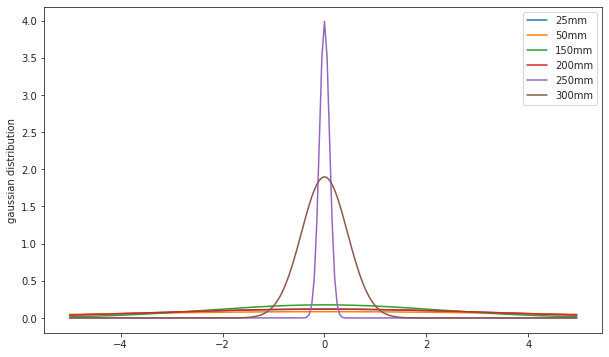

In [28]:


raw25_sd = np.std(raw_25mm)
raw25_median = np.median(raw_25mm)
raw50_sd = np.std(raw_50mm)
raw50_median = np.median(raw_50mm)
raw150_sd = np.std(raw_150mm)
raw150_median = np.median(raw_150mm)
raw200_sd = np.std(raw_200mm)
raw200_median = np.median(raw_200mm)
raw250_sd = np.std(raw_250mm)
raw250_median = np.median(raw_250mm)
raw300_sd = np.std(raw_300mm)
raw300_median = np.median(raw_300mm)

# Apply the same rejection filter process as above.
filtered25 = raw_25mm[ raw_25mm < (raw25_median+raw25_sd*3)]
filtered50 = raw_50mm[ raw_50mm < (raw50_median+raw50_sd*3)]
filtered150 = raw_150mm[ raw_150mm < (raw150_median+raw150_sd*3)]
filtered200 = raw_200mm[ raw_200mm < (raw200_median+raw200_sd*3)]
filtered250 = raw_250mm[ raw_250mm < (raw250_median+raw250_sd*3)]
filtered300 = raw_300mm[ raw_300mm < (raw300_median+raw300_sd*3)]


f25_sd = np.std(filtered25)
f50_sd = np.std(filtered50)
#f100_sd = np.std(filtered100)
f150_sd = np.std(filtered150)
f200_sd = np.std(filtered200)
f250_sd = np.std(filtered250)
f300_sd = np.std(filtered300)

x = np.arange(-5,5,.05)

# equation for a gaussian distribution function.
f25 = 1/(np.sqrt(2*np.pi)* f25_sd )*np.exp(-np.power((x ) / f25_sd, 2)/2)
f50 = 1/(np.sqrt(2*np.pi)* f50_sd )*np.exp(-np.power((x  ) / f50_sd, 2)/2)
#f100 = 1/(np.sqrt(2*np.pi)* f100_sd )*np.exp(-np.power((x ) / f100_sd, 2)/2)
f150 = 1/(np.sqrt(2*np.pi)* f150_sd )*np.exp(-np.power((x ) / f150_sd, 2)/2)
f200 = 1/(np.sqrt(2*np.pi)* f200_sd )*np.exp(-np.power((x ) / f200_sd, 2)/2)
f250 = 1/(np.sqrt(2*np.pi)* 0.1 )*np.exp(-np.power((x ) / 0.1, 2)/2)
#f300 = 1/(np.sqrt(2*np.pi)* f300_sd )*np.exp(-np.power((x ) / f300_sd, 2)/2)
f300 = 1/(np.sqrt(2*np.pi)* 0.21 )*np.exp(-np.power((x ) / 0.45, 2)/2)

plt.figure(figsize=(10,6))
plt.plot(x,f25, x, f50, x, f150, x, f200, x, f250, x, f300)
plt.legend(['25mm', '50mm', '150mm', '200mm', '250mm', '300mm'])

plt.ylabel('gaussian distribution')
plt.show()
